In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import Holt

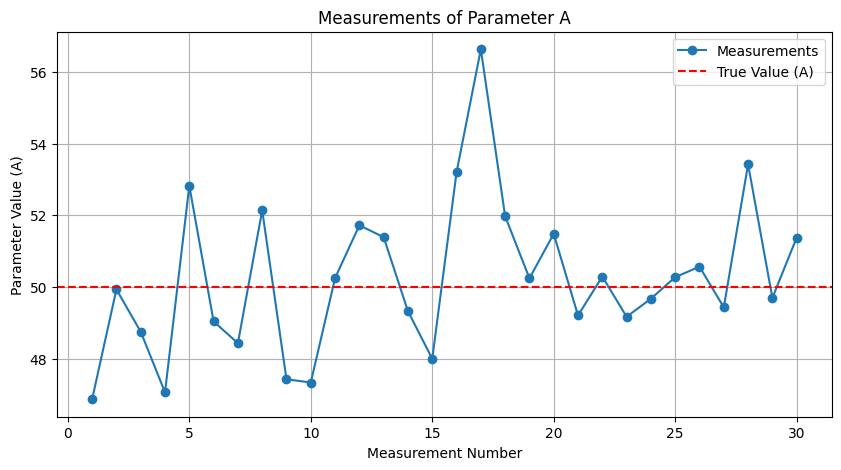

Analysis Results:
True Value of A: 50
Standard Deviation (σA): 2
Maximum Error (ΔA): 6.43

For the entire sample (N):
  Sample Mean: 50.24
  Sample Standard Deviation: 2.14
  Absolute Error: 1.61

For the subset (E(N/5)):
  Subset Size: 6
  Sample Mean: 49.09
  Sample Standard Deviation: 2.18
  Absolute Error: 1.53


In [2]:
# 1.1
def generate_measurements(true_value, std_dev, num_measurements, seed=None):
    """
    Generates a set of measurements for a parameter with normally distributed errors.
    
    Args:
        true_value (float): The true value of the parameter A.
        std_dev (float): The standard deviation (σA) of the measurements.
        num_measurements (int): Number of measurements (N).
        seed (int, optional): Random seed for reproducibility. Defaults to None.
    
    Returns:
        np.ndarray: Array of generated measurements.
    """
    if seed is not None:
        np.random.seed(seed)
        
    return true_value + np.random.normal(0, std_dev, num_measurements)

def calculate_errors(measurements, true_value):
    """
    Calculates statistical metrics for the given measurements.
    
    Args:
        measurements (np.ndarray): Array of measurement values.
        true_value (float): The true value of the parameter A.
    
    Returns:
        dict: Dictionary containing statistical metrics.
    """
    sample_mean = np.mean(measurements)
    sample_std = np.std(measurements, ddof=1)
    abs_error = np.mean(np.abs(measurements - sample_mean))
    max_error = 3 * sample_std
    
    return {
        "sample_mean": sample_mean,
        "sample_std": sample_std,
        "abs_error": abs_error,
        "max_error": max_error,
    }

def plot_measurements(measurements, true_value):
    """
    Plots the measurements with the true value as a reference.
    
    Args:
        measurements (np.ndarray): Array of measurement values.
        true_value (float): The true value of the parameter A.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(measurements) + 1), measurements, marker='o', label="Measurements")
    plt.axhline(true_value, color='red', linestyle='--', label="True Value (A)")
    plt.title("Measurements of Parameter A")
    plt.xlabel("Measurement Number")
    plt.ylabel("Parameter Value (A)")
    plt.legend()
    plt.grid()
    plt.show()

# Parameters
N = 30  # Total number of measurements
A = 50  # True value of parameter A
sigma_A = 2  # Standard deviation of measurements

# Generate measurements
measurements = generate_measurements(A, sigma_A, N, seed=50)

# Calculate errors for the entire sample
errors_N = calculate_errors(measurements, A)

# Subset analysis
subset_size = N // 5
subset_measurements = measurements[:subset_size]
errors_subset = calculate_errors(subset_measurements, A)

# Plot measurements
plot_measurements(measurements, A)

# Results
print("Analysis Results:")
print(f"True Value of A: {A}")
print(f"Standard Deviation (σA): {sigma_A}")
print(f"Maximum Error (ΔA): {errors_N['max_error']:.2f}")

print("\nFor the entire sample (N):")
print(f"  Sample Mean: {errors_N['sample_mean']:.2f}")
print(f"  Sample Standard Deviation: {errors_N['sample_std']:.2f}")
print(f"  Absolute Error: {errors_N['abs_error']:.2f}")

print("\nFor the subset (E(N/5)):")
print(f"  Subset Size: {subset_size}")
print(f"  Sample Mean: {errors_subset['sample_mean']:.2f}")
print(f"  Sample Standard Deviation: {errors_subset['sample_std']:.2f}")
print(f"  Absolute Error: {errors_subset['abs_error']:.2f}")

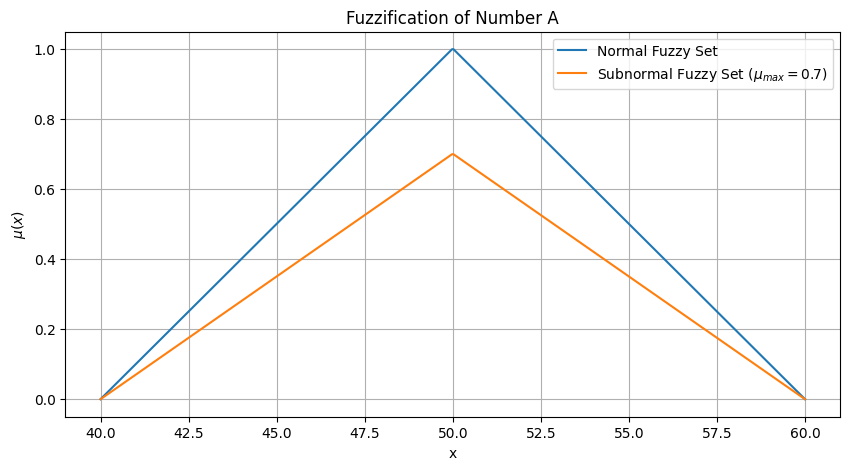

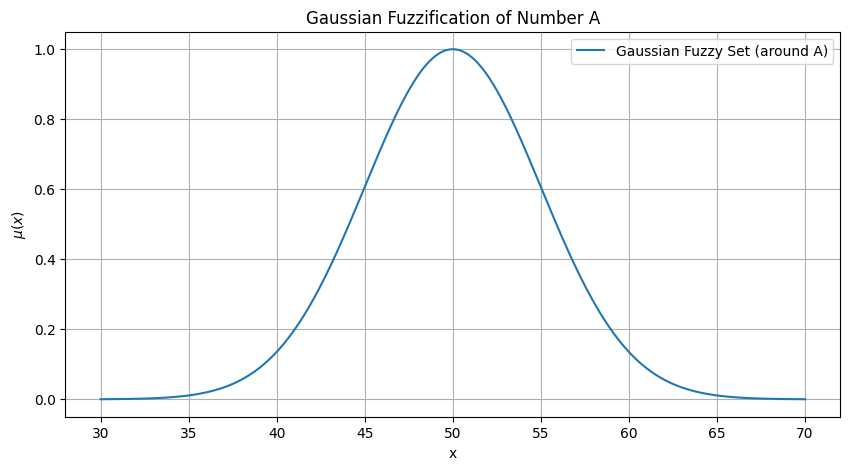

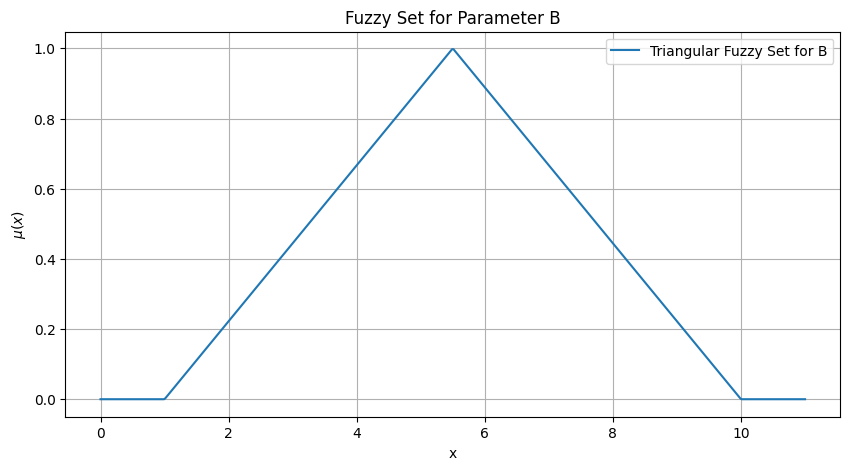

Fuzzy Set for B:
{np.int64(1): np.float64(0.0), np.int64(2): np.float64(0.22355822756624358), np.int64(3): np.float64(0.4439991093297707), np.int64(4): np.float64(0.6644399910932978), np.int64(5): np.float64(0.8897795591182365), np.int64(6): np.float64(0.8897795591182364), np.int64(7): np.float64(0.6644399910932977), np.int64(8): np.float64(0.4439991093297707), np.int64(9): np.float64(0.22355822756624338), np.int64(10): np.float64(0.0)}


In [3]:
# 1.2.1
def generate_normal_fuzzy_set(A, range_width, num_points):
    """
    Generate a normal fuzzy set for a given crisp number A.

    Args:
        A (float): Crisp number to fuzzify.
        range_width (float): Half the range width for the fuzzy set.
        num_points (int): Number of points for the graph.

    Returns:
        tuple: x (np.ndarray), membership values for the normal fuzzy set (np.ndarray).
    """
    x = np.linspace(A - range_width, A + range_width, num_points)
    mu = np.maximum(1 - np.abs(x - A) / range_width, 0)
    
    return x, mu

def generate_subnormal_fuzzy_set(normal_mu, subnormal_max):
    """
    Generate a subnormal fuzzy set by scaling a normal fuzzy set.

    Args:
        normal_mu (np.ndarray): Membership values for the normal fuzzy set.
        subnormal_max (float): Maximum membership value for the subnormal set.

    Returns:
        np.ndarray: Membership values for the subnormal fuzzy set.
    """
    return subnormal_max * normal_mu

def generate_gaussian_fuzzy_set(A, sigma, num_points):
    """
    Generate a Gaussian fuzzy set centered around a crisp number A.

    Args:
        A (float): Crisp number to fuzzify.
        sigma (float): Standard deviation for the Gaussian function.
        num_points (int): Number of points for the graph.

    Returns:
        tuple: x (np.ndarray), membership values for the Gaussian fuzzy set (np.ndarray).
    """
    x = np.linspace(A - 4 * sigma, A + 4 * sigma, num_points)
    mu = np.exp(-((x - A) ** 2) / (2 * sigma ** 2))
    
    return x, mu

def generate_triangular_fuzzy_set(B_min, B_max, num_points):
    """
    Generate a triangular fuzzy set for a range of natural numbers.

    Args:
        B_min (int): Minimum value of the range.
        B_max (int): Maximum value of the range.
        num_points (int): Number of points for the graph.

    Returns:
        tuple: x (np.ndarray), membership values for the triangular fuzzy set (np.ndarray).
    """
    B_mid = (B_min + B_max) / 2
    x = np.linspace(B_min - 1, B_max + 1, num_points)
    mu = np.maximum(0, np.minimum((x - B_min) / (B_mid - B_min), (B_max - x) / (B_max - B_mid)))
    
    return x, mu

def calculate_fuzzy_set_for_discrete_values(x, mu, discrete_values):
    """
    Calculate fuzzy membership values for a discrete set of values.

    Args:
        x (np.ndarray): x-axis values for the fuzzy set.
        mu (np.ndarray): Membership values for the fuzzy set.
        discrete_values (list): Discrete values to evaluate.

    Returns:
        dict: Fuzzy set for the discrete values.
    """
    return {value: mu[np.argmin(np.abs(x - value))] for value in discrete_values}

# Task A: Normal and subnormal fuzzy sets
A = 50
x_normal, mu_normal = generate_normal_fuzzy_set(A, range_width=10, num_points=500)
mu_subnormal = generate_subnormal_fuzzy_set(mu_normal, subnormal_max=0.7)

plt.figure(figsize=(10, 5))
plt.plot(x_normal, mu_normal, label="Normal Fuzzy Set")
plt.plot(x_normal, mu_subnormal, label=r"Subnormal Fuzzy Set ($\mu_{max}=0.7$)")
plt.title("Fuzzification of Number A")
plt.xlabel("x")
plt.ylabel(r"$\mu(x)$")
plt.legend()
plt.grid()
plt.show()

# Task B: Gaussian fuzzy set
sigma_A = 5
x_gaussian, mu_gaussian = generate_gaussian_fuzzy_set(A, sigma=sigma_A, num_points=500)

plt.figure(figsize=(10, 5))
plt.plot(x_gaussian, mu_gaussian, label="Gaussian Fuzzy Set (around A)")
plt.title("Gaussian Fuzzification of Number A")
plt.xlabel("x")
plt.ylabel(r"$\mu(x)$")
plt.legend()
plt.grid()
plt.show()

# Task C: Triangular fuzzy set
B = np.arange(1, 11)
x_triangular, mu_triangular = generate_triangular_fuzzy_set(B_min=min(B), B_max=max(B), num_points=500)

plt.figure(figsize=(10, 5))
plt.plot(x_triangular, mu_triangular, label="Triangular Fuzzy Set for B")
plt.title("Fuzzy Set for Parameter B")
plt.xlabel("x")
plt.ylabel(r"$\mu(x)$")
plt.legend()
plt.grid()
plt.show()

# Fuzzy set for discrete values
fuzzy_B = calculate_fuzzy_set_for_discrete_values(x_triangular, mu_triangular, B)
print("Fuzzy Set for B:")
print(fuzzy_B)

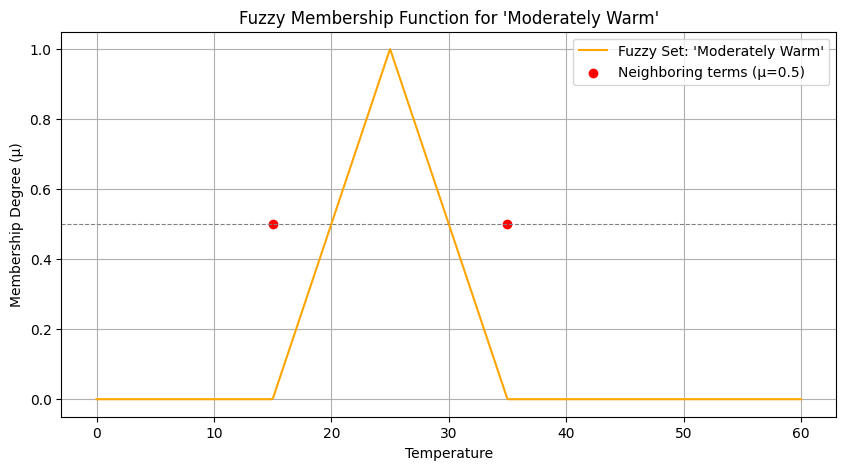

In [4]:
# 1.2.2
def generate_triangular_membership(x, center, left_width, right_width):
    """
    Generate a triangular membership function.

    Args:
        x (np.ndarray): Array of input values.
        center (float): Center of the triangle where μ(x) = 1.
        left_width (float): Width of the triangle's left side.
        right_width (float): Width of the triangle's right side.

    Returns:
        np.ndarray: Membership values for each x.
    """
    return np.maximum(0, np.minimum((x - (center - left_width)) / left_width, ((center + right_width) - x) / right_width))


def plot_membership_function(x, mu, term, neighbors=None):
    """
    Plot a fuzzy membership function.

    Args:
        x (np.ndarray): Array of input values.
        mu (np.ndarray): Membership values for each x.
        term (str): Term being represented, e.g., "Moderately Warm".
        neighbors (list, optional): Neighboring terms with membership of 0.5.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(x, mu, label=f"Fuzzy Set: '{term}'", color="orange")

    if neighbors:
        plt.scatter(neighbors, [0.5] * len(neighbors), color="red", label="Neighboring terms (μ=0.5)")

    plt.title(f"Fuzzy Membership Function for '{term}'")
    plt.xlabel("Temperature")
    plt.ylabel("Membership Degree (μ)")
    plt.axhline(y=0.5, color="gray", linestyle="--", linewidth=0.8)
    plt.legend()
    plt.grid()
    plt.show()


# Define the linguistic terms and their centers
terms = ["Very Cold", "Cold", "Moderately Warm", "Warm", "Very Warm", "Hot"]
centers = [5, 15, 25, 35, 45, 55]

# Define the x-axis values
x = np.linspace(0, 60, 500)

# Generate the triangular membership function for "Moderately Warm"
mu_moderately_warm = generate_triangular_membership(x, center=25, left_width=10, right_width=10)

# Plot the membership function
plot_membership_function(
    x,
    mu_moderately_warm,
    term="Moderately Warm",
    neighbors=[15, 35]
)

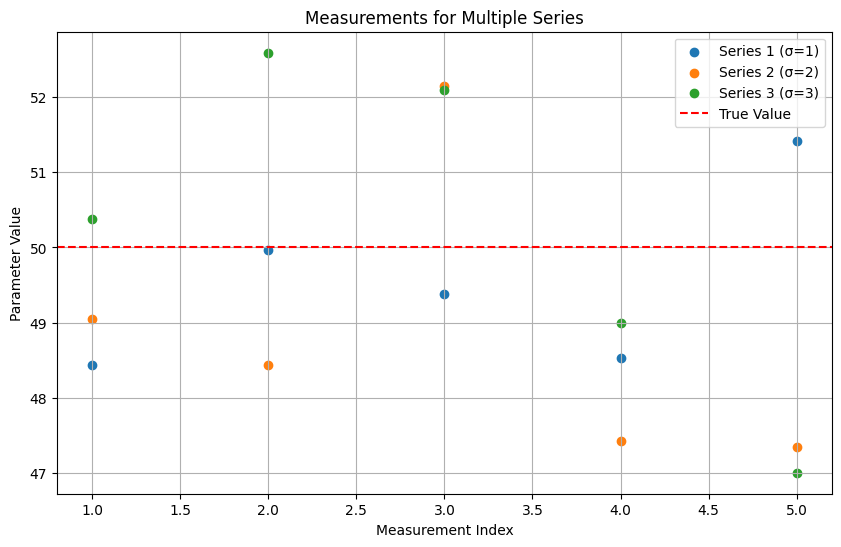

Results for N = 5
Unweighted Mean: 49.55
Unweighted Standard Deviation: 1.82
Weighted Mean: 49.48
Weighted Standard Deviation: 0.38


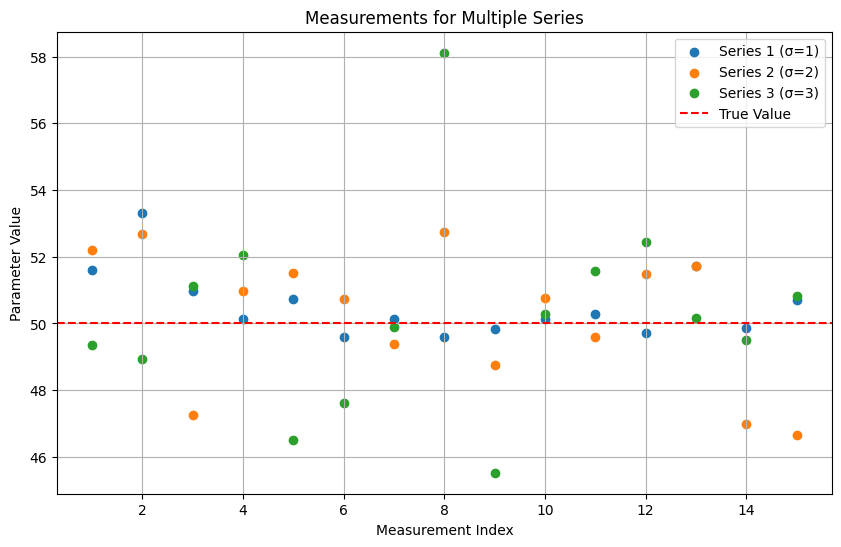


Results for N = 15
Unweighted Mean: 50.35
Unweighted Standard Deviation: 2.09
Weighted Mean: 50.47
Weighted Standard Deviation: 0.22


In [5]:
# 1.2.3
def weighted_mean(values, sigmas):
    """
    Calculate the weighted mean of a set of values given their standard deviations.

    Args:
        values (np.ndarray): The measurements.
        sigmas (np.ndarray): The standard deviations for each measurement.

    Returns:
        float: The weighted mean.
    """
    weights = 1 / (sigmas ** 2)
    
    return np.sum(weights * values) / np.sum(weights)


def calculate_statistics(measurements, sigmas):
    """
    Calculate mean and standard deviation with and without weights.

    Args:
        measurements (np.ndarray): Array of all measurements.
        sigmas (np.ndarray): Array of standard deviations corresponding to each measurement.

    Returns:
        dict: A dictionary containing mean and standard deviation for both weighted and unweighted cases.
    """
    mean_unweighted = np.mean(measurements)
    std_unweighted = np.std(measurements, ddof=1)
    mean_weighted = weighted_mean(measurements, sigmas)
    std_weighted = np.sqrt(1 / np.sum(1 / sigmas**2))

    return {
        "mean_unweighted": mean_unweighted,
        "std_unweighted": std_unweighted,
        "mean_weighted": mean_weighted,
        "std_weighted": std_weighted
    }


def generate_measurements(true_value, sigmas, n):
    """
    Generate sets of measurements with normal distribution for different standard deviations.

    Args:
        true_value (float): The true value of the parameter being measured.
        sigmas (list): List of standard deviations for different measurement series.
        n (int): Number of measurements per series.

    Returns:
        tuple: Concatenated arrays of all measurements and corresponding standard deviations.
    """
    measurements = []
    
    for sigma in sigmas:
        series = np.random.normal(loc=true_value, scale=sigma, size=n)
        measurements.append(series)

    all_measurements = np.concatenate(measurements)
    all_sigmas = np.concatenate([[sigma] * n for sigma in sigmas])

    return all_measurements, all_sigmas


def plot_measurements(series, true_value, sigmas):
    """
    Plot measurements for each series along with the true value.

    Args:
        series (list): List of measurement series.
        true_value (float): The true value of the parameter.
        sigmas (list): List of standard deviations for each series.
    """
    plt.figure(figsize=(10, 6))
    
    for i, single_series in enumerate(series):
        plt.scatter(range(1, len(single_series) + 1), single_series, label=f"Series {i+1} (σ={sigmas[i]})")
        
    plt.axhline(true_value, color="red", linestyle="--", label="True Value")
    plt.title("Measurements for Multiple Series")
    plt.xlabel("Measurement Index")
    plt.ylabel("Parameter Value")
    plt.legend()
    plt.grid()
    plt.show()


# Set parameters
true_value = 50  # The true value of parameter A
initial_n = 5  # Initial number of measurements per series
sigmas = [1, 2, 3]  # Standard deviations for the three series

# Generate initial measurements
np.random.seed(50)
all_measurements, all_sigmas = generate_measurements(true_value, sigmas, initial_n)

# Calculate statistics
initial_stats = calculate_statistics(all_measurements, all_sigmas)

# Plot the measurements
plot_measurements([all_measurements[i * initial_n:(i + 1) * initial_n] for i in range(len(sigmas))], true_value, sigmas)

# Display results for the initial number of measurements
print("Results for N =", initial_n)
print(f"Unweighted Mean: {initial_stats['mean_unweighted']:.2f}")
print(f"Unweighted Standard Deviation: {initial_stats['std_unweighted']:.2f}")
print(f"Weighted Mean: {initial_stats['mean_weighted']:.2f}")
print(f"Weighted Standard Deviation: {initial_stats['std_weighted']:.2f}")

# Increase the number of measurements
extended_n = 15  # Increased number of measurements per series
all_measurements, all_sigmas = generate_measurements(true_value, sigmas, extended_n)

# Calculate statistics for the increased number of measurements
extended_stats = calculate_statistics(all_measurements, all_sigmas)

# Plot the extended measurements
plot_measurements([all_measurements[i * extended_n:(i + 1) * extended_n] for i in range(len(sigmas))], true_value, sigmas)

# Display results for the extended number of measurements
print("\nResults for N =", extended_n)
print(f"Unweighted Mean: {extended_stats['mean_unweighted']:.2f}")
print(f"Unweighted Standard Deviation: {extended_stats['std_unweighted']:.2f}")
print(f"Weighted Mean: {extended_stats['mean_weighted']:.2f}")
print(f"Weighted Standard Deviation: {extended_stats['std_weighted']:.2f}")

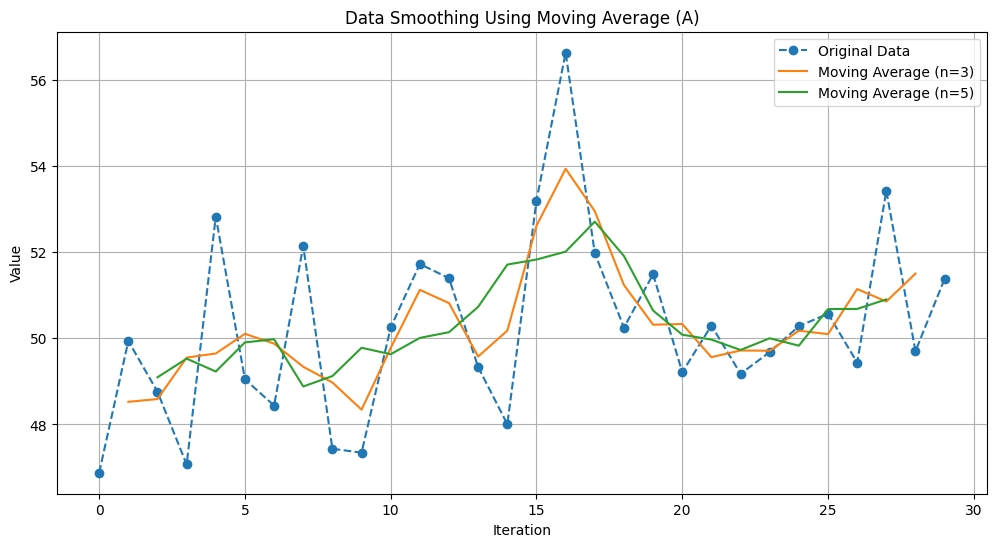

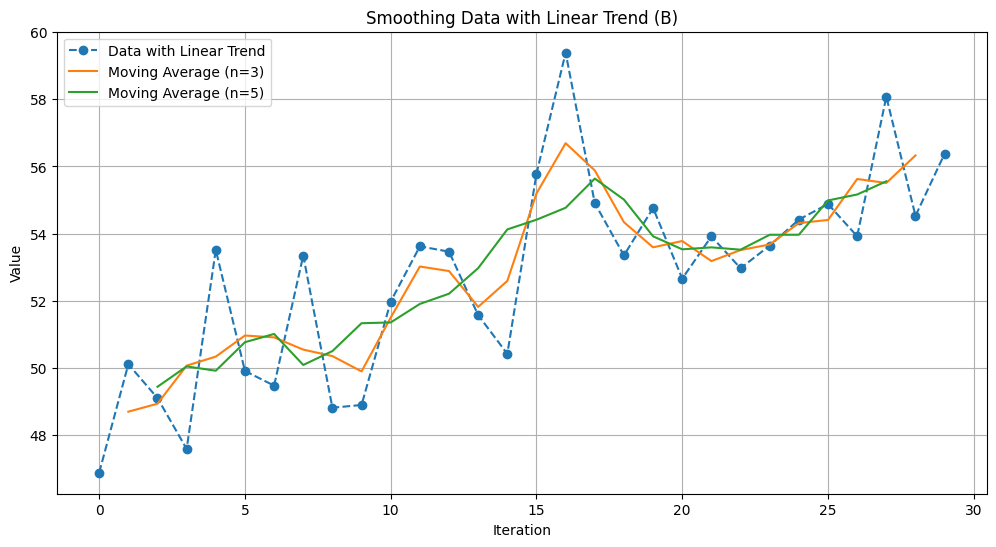

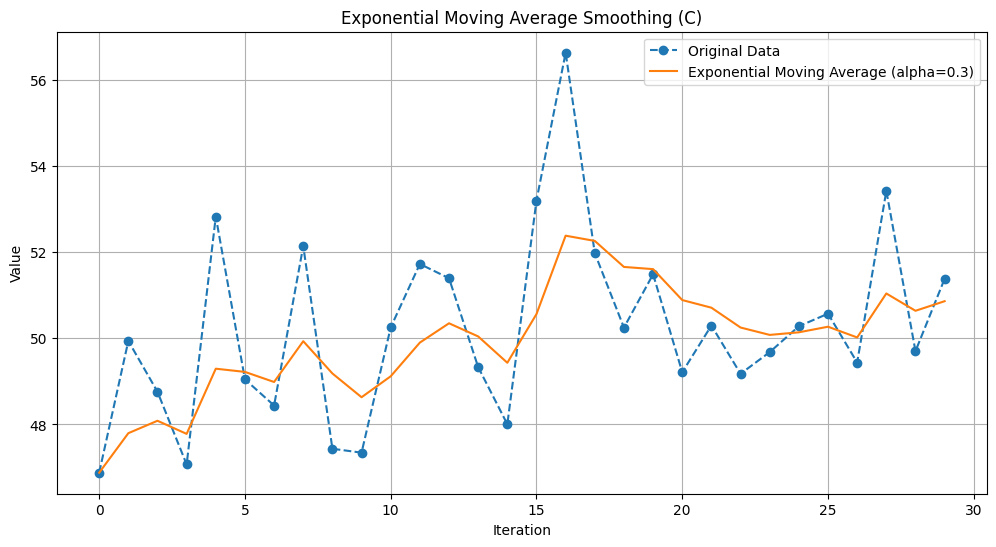

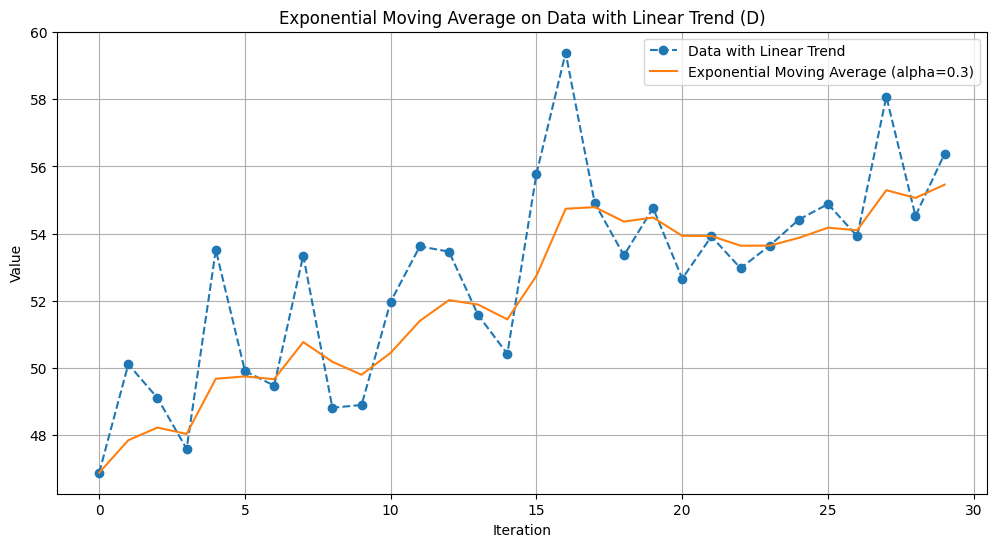

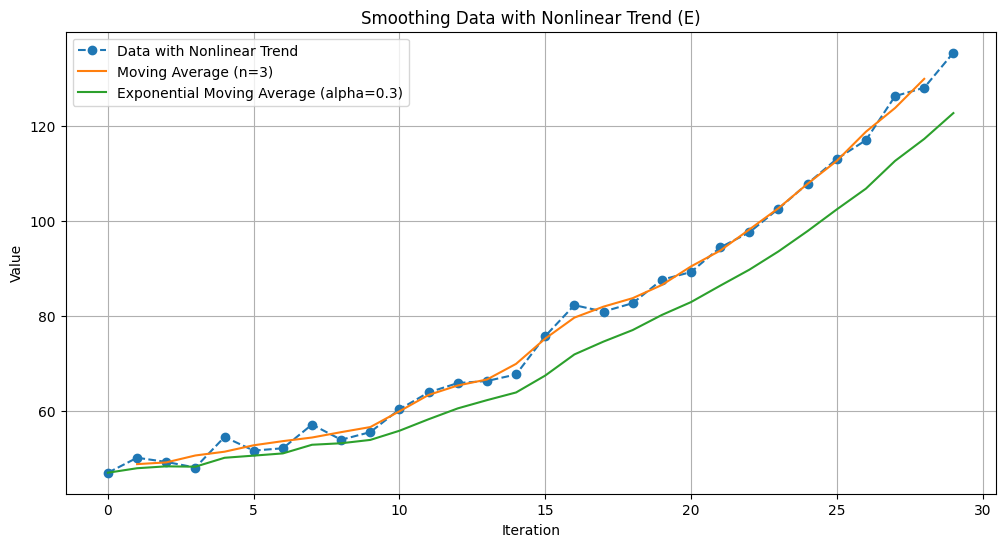

In [6]:
# 2.1.1
def moving_average(data: np.ndarray, window_size: int) -> np.ndarray:
    """
    Calculate the moving average of the given data.

    Args:
        data (np.ndarray): The input data array.
        window_size (int): The size of the moving average window.

    Returns:
        np.ndarray: The smoothed data using moving average.
    """
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')


def exponential_moving_average(data: np.ndarray, alpha: float) -> np.ndarray:
    """
    Calculate the exponential moving average of the given data.

    Args:
        data (np.ndarray): The input data array.
        alpha (float): The smoothing factor (0 < alpha ≤ 1).

    Returns:
        np.ndarray: The smoothed data using exponential moving average.
    """
    ema = [data[0]]  # Initialize with the first data point
    
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
        
    return np.array(ema)


# Step A: Generate data and apply simple moving average
np.random.seed(50)
N = 30  # Number of measurements
A = 50  # Constant parameter
sigma_A = 2  # Standard deviation of noise
measurements = np.random.normal(A, sigma_A, N)  # Simulated measurements

# Apply moving averages
ma_n3 = moving_average(measurements, 3)
ma_n5 = moving_average(measurements, 5)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(measurements, label='Original Data', linestyle='--', marker='o')
plt.plot(range(1, len(ma_n3) + 1), ma_n3, label='Moving Average (n=3)', linestyle='-')
plt.plot(range(2, len(ma_n5) + 2), ma_n5, label='Moving Average (n=5)', linestyle='-')
plt.title('Data Smoothing Using Moving Average (A)')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Step B: Add a linear trend and apply moving average
trend = np.linspace(0, 5, N)
measurements_with_trend = measurements + trend
ma_n3_trend = moving_average(measurements_with_trend, 3)
ma_n5_trend = moving_average(measurements_with_trend, 5)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(measurements_with_trend, label='Data with Linear Trend', linestyle='--', marker='o')
plt.plot(range(1, len(ma_n3_trend) + 1), ma_n3_trend, label='Moving Average (n=3)', linestyle='-')
plt.plot(range(2, len(ma_n5_trend) + 2), ma_n5_trend, label='Moving Average (n=5)', linestyle='-')
plt.title('Smoothing Data with Linear Trend (B)')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Step C: Exponential moving average on original data
alpha = 0.3
ema_a = exponential_moving_average(measurements, alpha)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(measurements, label='Original Data', linestyle='--', marker='o')
plt.plot(ema_a, label=f'Exponential Moving Average (alpha={alpha})', linestyle='-')
plt.title('Exponential Moving Average Smoothing (C)')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Step D: Exponential moving average on data with trend
ema_b = exponential_moving_average(measurements_with_trend, alpha)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(measurements_with_trend, label='Data with Linear Trend', linestyle='--', marker='o')
plt.plot(ema_b, label=f'Exponential Moving Average (alpha={alpha})', linestyle='-')
plt.title('Exponential Moving Average on Data with Linear Trend (D)')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Step E: Add nonlinear trend and smooth the data
nonlinear_trend = 0.1 * (np.arange(N) ** 2)
measurements_with_nonlinear_trend = measurements + nonlinear_trend
ma_n3_nonlinear = moving_average(measurements_with_nonlinear_trend, 3)
ema_nonlinear = exponential_moving_average(measurements_with_nonlinear_trend, alpha)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(measurements_with_nonlinear_trend, label='Data with Nonlinear Trend', linestyle='--', marker='o')
plt.plot(range(1, len(ma_n3_nonlinear) + 1), ma_n3_nonlinear, label='Moving Average (n=3)', linestyle='-')
plt.plot(ema_nonlinear, label=f'Exponential Moving Average (alpha={alpha})', linestyle='-')
plt.title('Smoothing Data with Nonlinear Trend (E)')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

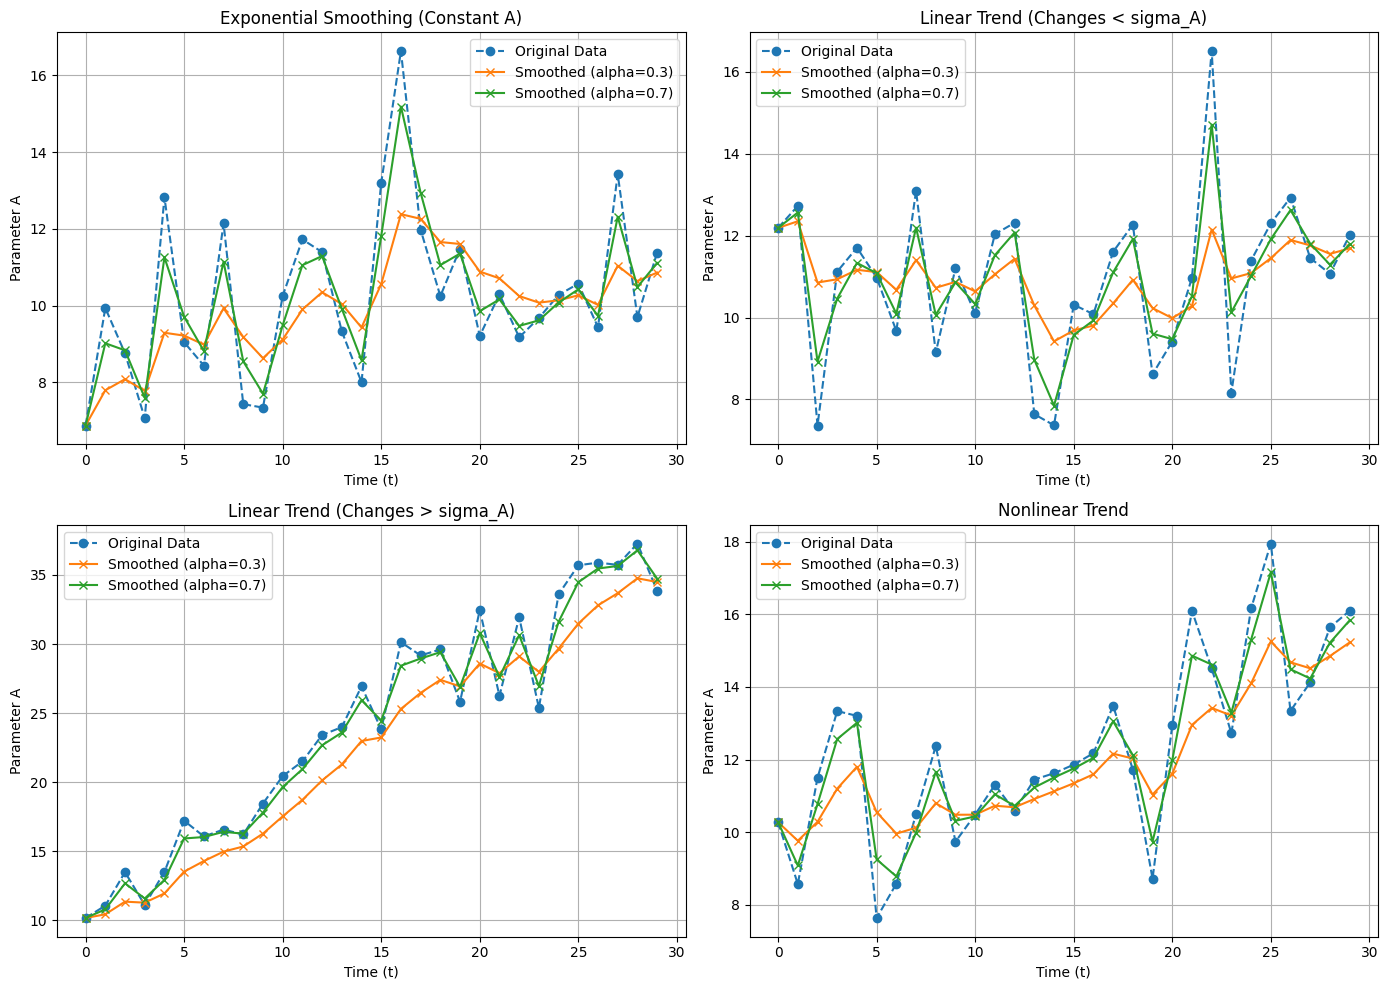

In [7]:
# 2.1.2
def exponential_smoothing(data, alpha):
    """Applies exponential smoothing to a data series.

    Args:
        data (list or np.ndarray): The time series data to smooth.
        alpha (float): The smoothing factor (0 < alpha <= 1).

    Returns:
        list: Smoothed data series.
    """
    smoothed_data = [data[0]]  # Initialize with the first data point
    
    for t in range(1, len(data)):
        smoothed_value = alpha * data[t] + (1 - alpha) * smoothed_data[-1]
        smoothed_data.append(smoothed_value)
        
    return smoothed_data

def plot_data(ax, original_data, smoothed_data, title):
    """Plots original and smoothed data on the given axis.

    Args:
        ax (matplotlib.axes.Axes): Axis to plot on.
        original_data (np.ndarray): Original data series.
        smoothed_data (dict): Dictionary of smoothed data for different alpha values.
        title (str): Title of the subplot.
    """
    ax.plot(original_data, label='Original Data', marker='o', linestyle='--')
    
    for alpha, smoothed in smoothed_data.items():
        ax.plot(smoothed, label=f'Smoothed (alpha={alpha})', marker='x')
        
    ax.set_title(title)
    ax.set_xlabel('Time (t)')
    ax.set_ylabel('Parameter A')
    ax.legend()
    ax.grid(True)

# Parameters
N = 30  # Number of measurements
A = 10  # True value of the parameter
sigma_A = 2  # Standard deviation of noise
alpha_values = [0.3, 0.7]  # Smoothing factors

# Seed for reproducibility
np.random.seed(50)

# Generate data for Task A
constant_data = A + np.random.normal(0, sigma_A, N)

# Generate data for Task B (linear trend, changes < sigma_A)
trend_slope_b = 0.05
linear_trend_data_b = A + trend_slope_b * np.arange(N) + np.random.normal(0, sigma_A, N)

# Generate data for Task C (linear trend, changes > sigma_A)
trend_slope_c = 1.0
linear_trend_data_c = A + trend_slope_c * np.arange(N) + np.random.normal(0, sigma_A, N)

# Generate data for Task D (nonlinear trend)
nonlinear_trend = 0.01 * np.arange(N)**2
nonlinear_trend_data = A + nonlinear_trend + np.random.normal(0, sigma_A, N)

# Apply exponential smoothing for all tasks
smoothed_constant = {alpha: exponential_smoothing(constant_data, alpha) for alpha in alpha_values}
smoothed_linear_b = {alpha: exponential_smoothing(linear_trend_data_b, alpha) for alpha in alpha_values}
smoothed_linear_c = {alpha: exponential_smoothing(linear_trend_data_c, alpha) for alpha in alpha_values}
smoothed_nonlinear = {alpha: exponential_smoothing(nonlinear_trend_data, alpha) for alpha in alpha_values}

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot Task A
plot_data(axes[0, 0], constant_data, smoothed_constant, "Exponential Smoothing (Constant A)")

# Plot Task B
plot_data(axes[0, 1], linear_trend_data_b, smoothed_linear_b, "Linear Trend (Changes < sigma_A)")

# Plot Task C
plot_data(axes[1, 0], linear_trend_data_c, smoothed_linear_c, "Linear Trend (Changes > sigma_A)")

# Plot Task D
plot_data(axes[1, 1], nonlinear_trend_data, smoothed_nonlinear, "Nonlinear Trend")

fig.tight_layout()
plt.show()

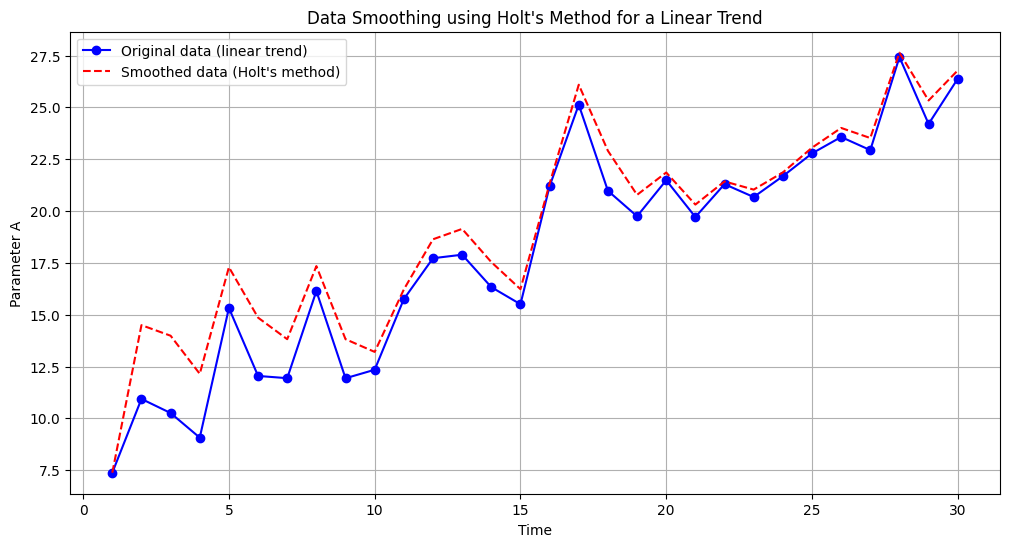

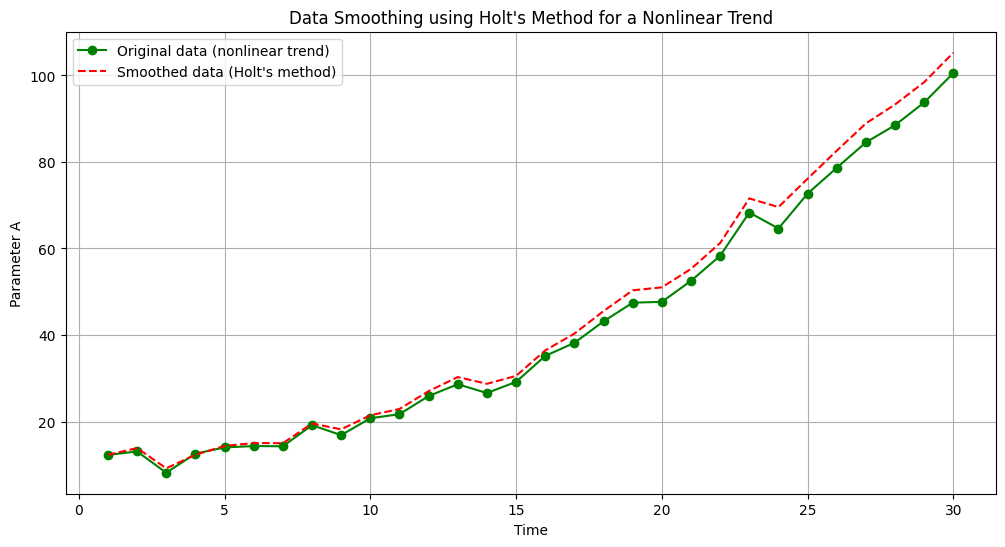

In [8]:
# 2.1.3
def holt_smoothing(data, alpha, beta):
    """
    Performs data smoothing using Holt's method.

    Args:
        data (array-like): Input dataset.
        alpha (float): Smoothing coefficient for the level.
        beta (float): Smoothing coefficient for the trend.

    Returns:
        list: List of smoothed values.
    """
    level = data[0]  # Initial level
    trend = data[1] - data[0]  # Initial trend
    smoothed = [level]  # List to store smoothed values

    # Main loop for Holt's smoothing
    for i in range(1, len(data)):
        new_level = alpha * data[i] + (1 - alpha) * (level + trend)
        new_trend = beta * (new_level - level) + (1 - beta) * trend
        smoothed.append(new_level + new_trend)
        level, trend = new_level, new_trend

    return smoothed

# Parameters for data generation
N = 30  # Number of measurements
A0 = 10  # Initial value of parameter A
trend_slope = 0.5  # Slope of the linear trend
sigma_A = 2  # Standard deviation of noise

# Generate data with a linear trend
np.random.seed(50)
time_points = np.arange(1, N + 1)  # Time points
data_linear_trend = A0 + trend_slope * time_points + np.random.normal(0, sigma_A, N)

# Generate data with a nonlinear trend
nonlinear_trend = 0.1 * time_points**2  # Quadratic component for nonlinearity
data_nonlinear_trend = A0 + nonlinear_trend + np.random.normal(0, sigma_A, N)

# Apply Holt's smoothing
alpha = 0.8  # Smoothing coefficient for the level
beta = 0.2  # Smoothing coefficient for the trend

smoothed_linear = holt_smoothing(data_linear_trend, alpha, beta)
smoothed_nonlinear = holt_smoothing(data_nonlinear_trend, alpha, beta)

# Visualization for linear trend
plt.figure(figsize=(12, 6))
plt.plot(time_points, data_linear_trend, label="Original data (linear trend)", color="blue", marker="o")
plt.plot(time_points, smoothed_linear, label="Smoothed data (Holt's method)", color="red", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Parameter A")
plt.title("Data Smoothing using Holt's Method for a Linear Trend")
plt.legend()
plt.grid(True)
plt.show()

# Visualization for nonlinear trend
plt.figure(figsize=(12, 6))
plt.plot(time_points, data_nonlinear_trend, label="Original data (nonlinear trend)", color="green", marker="o")
plt.plot(time_points, smoothed_nonlinear, label="Smoothed data (Holt's method)", color="red", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Parameter A")
plt.title("Data Smoothing using Holt's Method for a Nonlinear Trend")
plt.legend()
plt.grid(True)
plt.show()

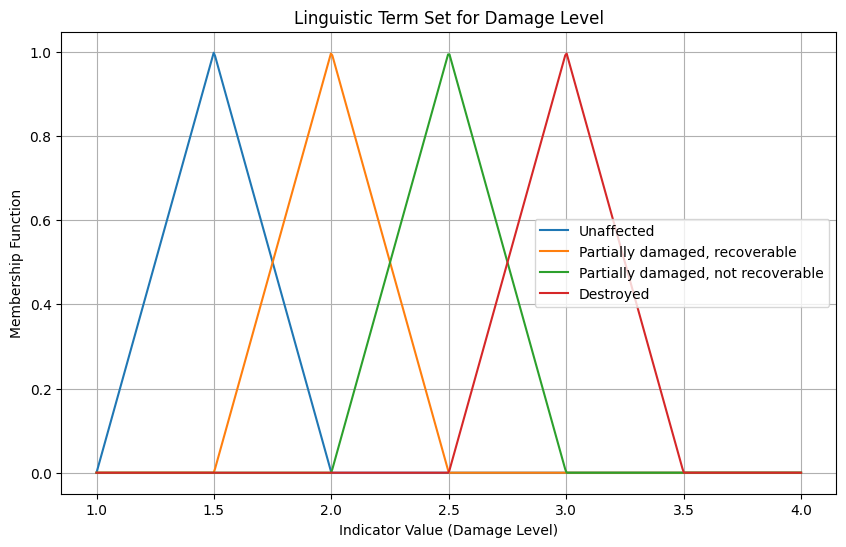

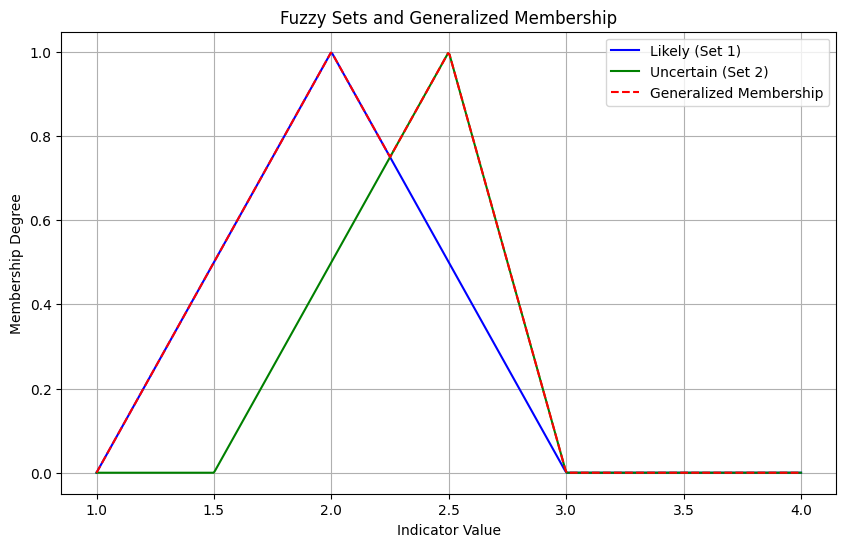

Confidence for Message 1: 2.99399
Confidence for Message 2: 2.99098
Generalized Confidence: 2.99399


In [9]:
# 2.2.1
def triangular_membership(x, a, b, c):
    """
    Calculate the membership value for a given x using a triangular membership function.

    Args:
        x (float): Input value.
        a (float): Left endpoint of the triangle.
        b (float): Peak of the triangle.
        c (float): Right endpoint of the triangle.

    Returns:
        float: Membership value for the input x.
    """
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

# Define linguistic terms and their parameters
linguistic_terms = {
    "Unaffected": (1, 1.5, 2),
    "Partially damaged, recoverable": (1.5, 2, 2.5),
    "Partially damaged, not recoverable": (2, 2.5, 3),
    "Destroyed": (2.5, 3, 3.5)
}

# Generate x values for plotting
x = np.linspace(1, 4, 500)

# Plot each linguistic term
plt.figure(figsize=(10, 6))
for label, (a, b, c) in linguistic_terms.items():
    membership_values = triangular_membership(x, a, b, c)
    plt.plot(x, membership_values, label=label)

plt.title("Linguistic Term Set for Damage Level")
plt.xlabel("Indicator Value (Damage Level)")
plt.ylabel("Membership Function")
plt.legend()
plt.grid(True)
plt.show()

def fuzzy_set_combination():
    """
    Create and visualize the combination of two fuzzy sets and their generalized membership.
    """
    # Parameters for two fuzzy sets
    a1, b1, c1 = 1, 2, 3  # Fuzzy set 1
    a2, b2, c2 = 1.5, 2.5, 3  # Fuzzy set 2

    membership_1 = triangular_membership(x, a1, b1, c1)
    membership_2 = triangular_membership(x, a2, b2, c2)

    # Combine memberships
    combined_membership = np.maximum(membership_1, membership_2)

    # Plot memberships
    plt.figure(figsize=(10, 6))
    plt.plot(x, membership_1, label="Likely (Set 1)", color="blue")
    plt.plot(x, membership_2, label="Uncertain (Set 2)", color="green")
    plt.plot(x, combined_membership, label="Generalized Membership", color="red", linestyle="--")

    plt.title("Fuzzy Sets and Generalized Membership")
    plt.xlabel("Indicator Value")
    plt.ylabel("Membership Degree")
    plt.legend()
    plt.grid(True)
    plt.show()

    return membership_1, membership_2, combined_membership

def get_confidence_level(membership, K):
    """
    Calculate the confidence level for a given membership function.

    Args:
        membership (np.ndarray): Membership values.
        K (int): Scaling factor for confidence.

    Returns:
        float: Confidence level.
    """
    max_membership_value = np.max(membership)
    confidence = max_membership_value * K
    
    return min(confidence, K)

# Execute and display results
membership_1, membership_2, combined_membership = fuzzy_set_combination()
K = 3

confidence_1 = get_confidence_level(membership_1, K)
confidence_2 = get_confidence_level(membership_2, K)
confidence_combined = get_confidence_level(combined_membership, K)

print(f"Confidence for Message 1: {confidence_1:.5f}")
print(f"Confidence for Message 2: {confidence_2:.5f}")
print(f"Generalized Confidence: {confidence_combined:.5f}")

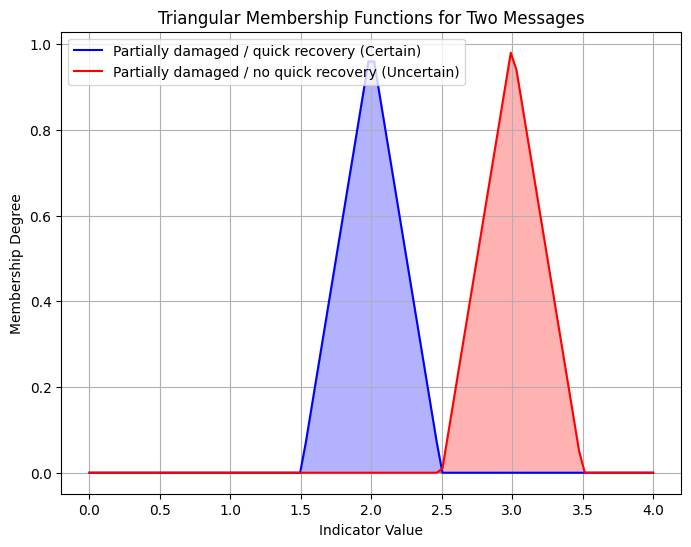

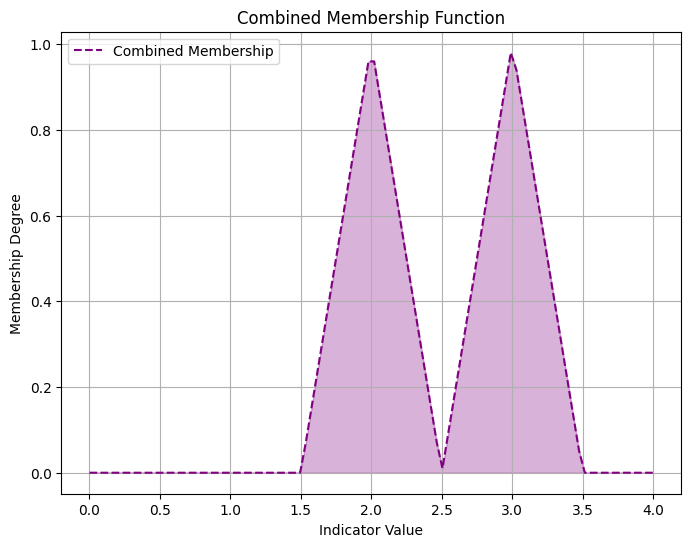

Final Standardized Certainty Level: 2.242


In [10]:
# 2.2.2
def triangular_membership(x, a, b, c):
    """
    Compute the triangular membership value for a given x.
    
    Args:
        x (numpy.ndarray): Input values for which the membership function is calculated.
        a (float): The starting point of the triangular function (left base).
        b (float): The peak point of the triangular function.
        c (float): The ending point of the triangular function (right base).
        
    Returns:
        numpy.ndarray: Membership values for the input x.
    """
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

# Define the range for x
x = np.linspace(0, 4, 100)

# Define the fuzzy sets for two messages
# Message 1: Partially damaged / quick recovery (certain)
a1, b1, c1 = 1.5, 2, 2.5
membership1 = triangular_membership(x, a1, b1, c1)

# Message 2: Partially damaged / no quick recovery (uncertain)
a2, b2, c2 = 2.5, 3, 3.5
membership2 = triangular_membership(x, a2, b2, c2)

# Plot the membership functions for both messages
plt.figure(figsize=(8, 6))
plt.plot(x, membership1, label='Partially damaged / quick recovery (Certain)', color='blue')
plt.plot(x, membership2, label='Partially damaged / no quick recovery (Uncertain)', color='red')
plt.fill_between(x, membership1, color='blue', alpha=0.3)
plt.fill_between(x, membership2, color='red', alpha=0.3)
plt.title('Triangular Membership Functions for Two Messages')
plt.xlabel('Indicator Value')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

# Combine the membership functions using maximum operator
combined_membership = np.maximum(membership1, membership2)

# Certainty levels for the messages
certainty1 = 1.0  # Certain
certainty2 = 0.5  # Uncertain

# Calculate the combined certainty
combined_certainty = (certainty1 * np.max(membership1) + certainty2 * np.max(membership2)) / (
    np.max(membership1) + np.max(membership2))

# Scale the certainty to the standard level (K=3)
standard_certainty = combined_certainty * 3

# Display the combined membership and certainty level
plt.figure(figsize=(8, 6))
plt.plot(x, combined_membership, label='Combined Membership', color='purple', linestyle='--')
plt.fill_between(x, combined_membership, color='purple', alpha=0.3)
plt.title('Combined Membership Function')
plt.xlabel('Indicator Value')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final Standardized Certainty Level: {standard_certainty:.3f}")

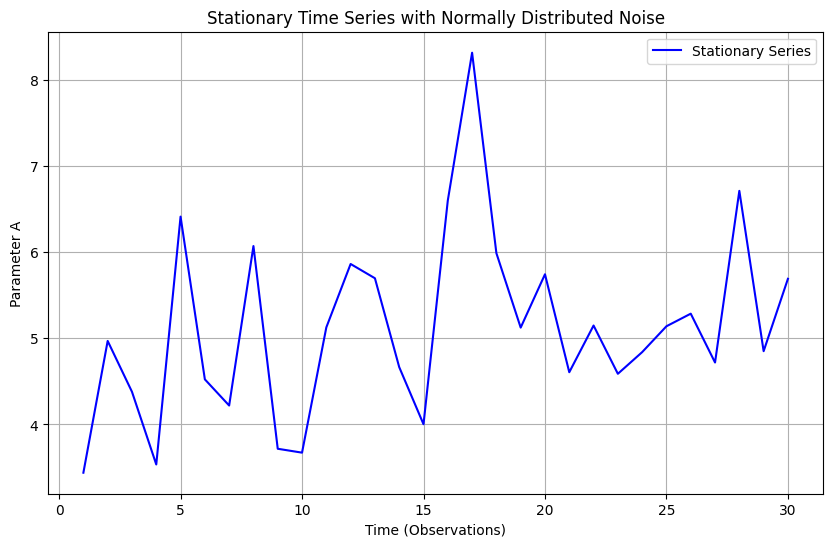

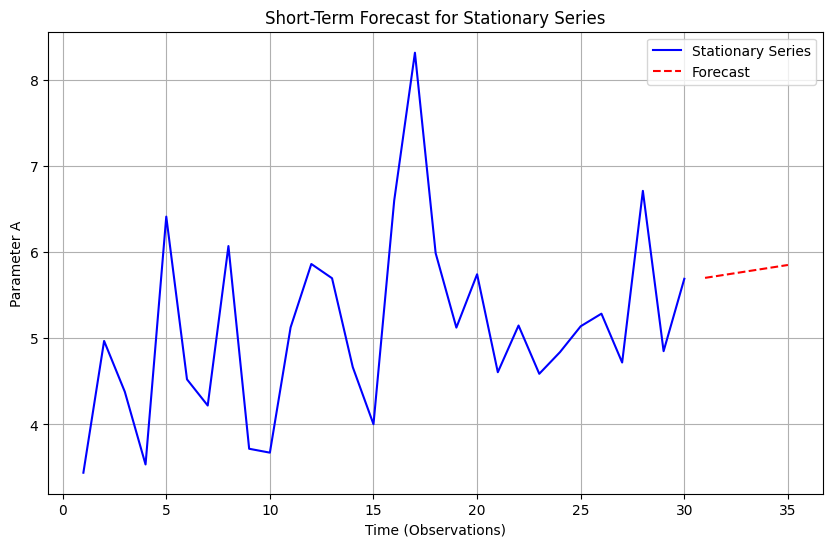

Forecasted values for the next 5 observations (stationary series):
[5.70106433 5.73847626 5.77588819 5.81330012 5.85071205]


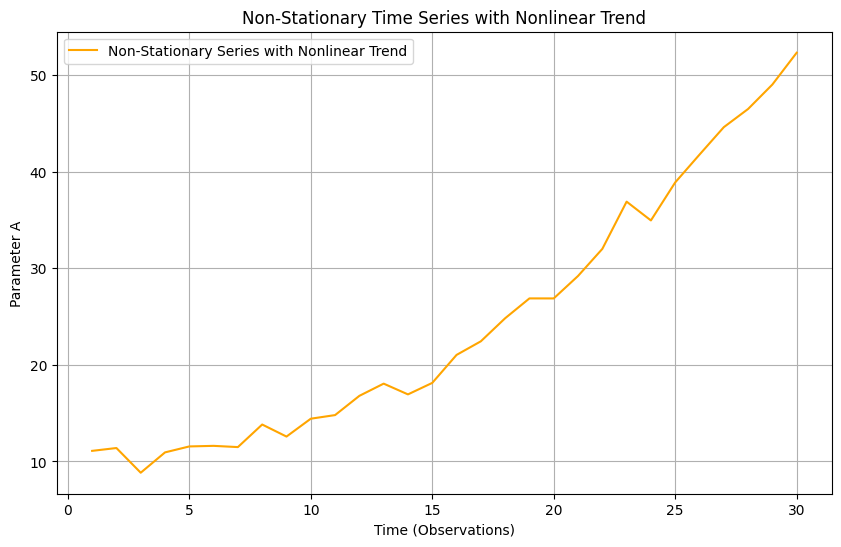

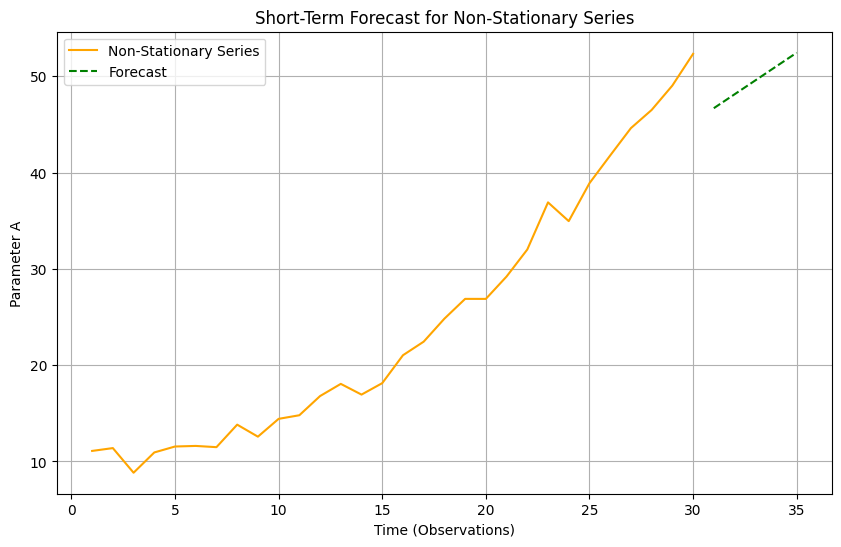

Forecasted values for the next 5 observations (non-stationary series):
[46.68535181 48.1257923  49.56623278 51.00667327 52.44711375]


In [11]:
# 3.1
# Set global random seed for reproducibility
np.random.seed(50)


def generate_stationary_series(length, true_value, noise_std):
    """
    Generates a stationary time series with normally distributed noise.
    
    Args:
        length (int): Number of observations.
        true_value (float): True value of the parameter (constant throughout observations).
        noise_std (float): Standard deviation of the noise.
    
    Returns:
        np.ndarray: Stationary time series.
    """
    noise = np.random.normal(0, noise_std, length)
    series = np.full(length, true_value) + noise
    
    return series


def short_term_forecast(series, future_steps=5):
    """
    Performs short-term forecasting using the least squares method and a linear regression model.
    
    Args:
        series (np.ndarray): Input time series for modeling.
        future_steps (int): Number of future time points to forecast.
    
    Returns:
        np.ndarray: Predicted values for future time points.
    """
    # Prepare training data (time indices and corresponding values)
    X_train = np.arange(len(series)).reshape(-1, 1)
    y_train = series
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Generate future time indices and predict their values
    X_future = np.arange(len(series), len(series) + future_steps).reshape(-1, 1)
    predictions = model.predict(X_future)
    
    return predictions


# 1. Generate and plot stationary time series
N = 30
A_true = 5
std_dev = 1

stationary_series = generate_stationary_series(N, A_true, std_dev)

# Plot the stationary series
plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), stationary_series, label='Stationary Series', color='blue')
plt.title('Stationary Time Series with Normally Distributed Noise')
plt.xlabel('Time (Observations)')
plt.ylabel('Parameter A')
plt.grid(True)
plt.legend()
plt.show()

# Forecast stationary series
forecast_stationary = short_term_forecast(stationary_series)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), stationary_series, label='Stationary Series', color='blue')
plt.plot(range(N + 1, N + 6), forecast_stationary, label='Forecast', color='red', linestyle='--')
plt.title('Short-Term Forecast for Stationary Series')
plt.xlabel('Time (Observations)')
plt.ylabel('Parameter A')
plt.grid(True)
plt.legend()
plt.show()

print("Forecasted values for the next 5 observations (stationary series):")
print(forecast_stationary)


def generate_nonlinear_trend_series(length, base_value, trend_coeff, noise_std):
    """
    Generates a non-stationary time series with a nonlinear trend and noise.
    
    Args:
        length (int): Number of observations.
        base_value (float): Base value of the parameter.
        trend_coeff (float): Coefficient for the quadratic trend.
        noise_std (float): Standard deviation of the noise.
    
    Returns:
        np.ndarray: Non-stationary time series.
    """
    time = np.arange(length)
    trend = trend_coeff * time**2
    series = base_value + trend + np.random.normal(0, noise_std, length)
    return series


# 2. Generate and plot non-stationary time series
base_value = 10
trend_coefficient = 0.05
nonstationary_series = generate_nonlinear_trend_series(N, base_value, trend_coefficient, std_dev)

# Plot the non-stationary series
plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), nonstationary_series, label='Non-Stationary Series with Nonlinear Trend', color='orange')
plt.title('Non-Stationary Time Series with Nonlinear Trend')
plt.xlabel('Time (Observations)')
plt.ylabel('Parameter A')
plt.grid(True)
plt.legend()
plt.show()

# Forecast non-stationary series
forecast_nonstationary = short_term_forecast(nonstationary_series)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), nonstationary_series, label='Non-Stationary Series', color='orange')
plt.plot(range(N + 1, N + 6), forecast_nonstationary, label='Forecast', color='green', linestyle='--')
plt.title('Short-Term Forecast for Non-Stationary Series')
plt.xlabel('Time (Observations)')
plt.ylabel('Parameter A')
plt.grid(True)
plt.legend()
plt.show()

print("Forecasted values for the next 5 observations (non-stationary series):")
print(forecast_nonstationary)

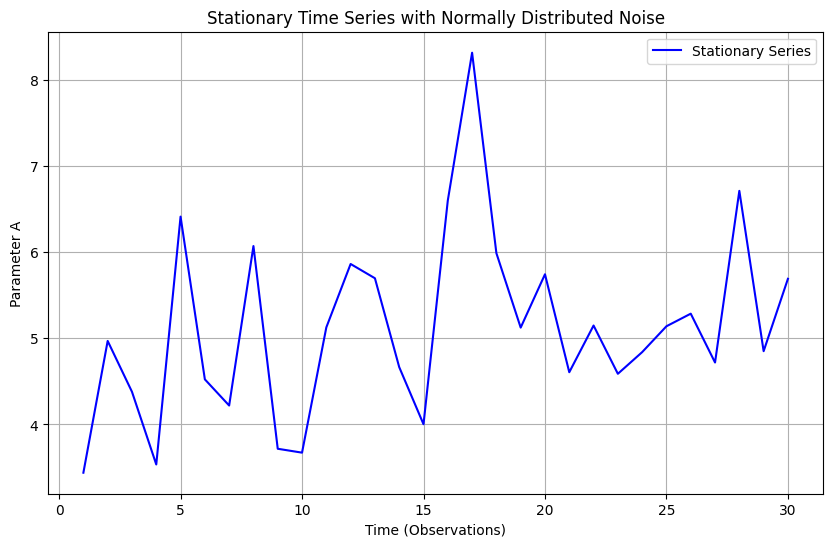

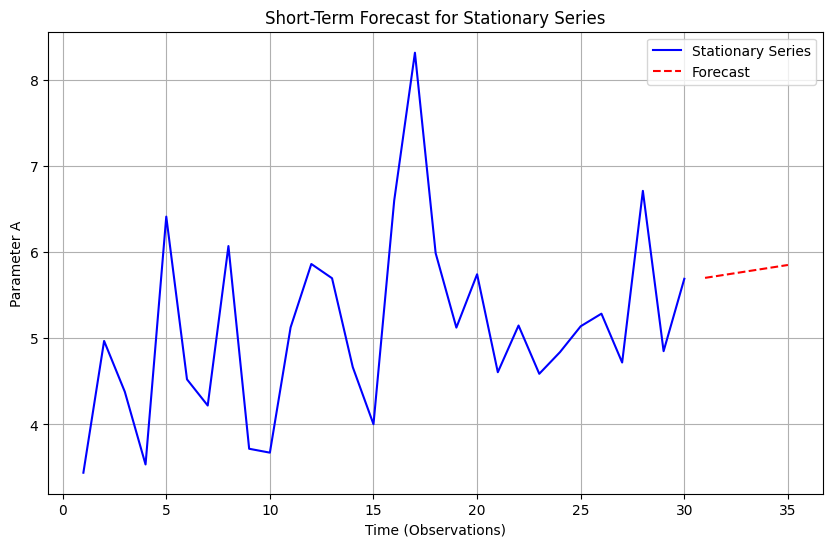

Forecasted values for the next 5 observations (stationary series):
[5.70106433 5.73847626 5.77588819 5.81330012 5.85071205]


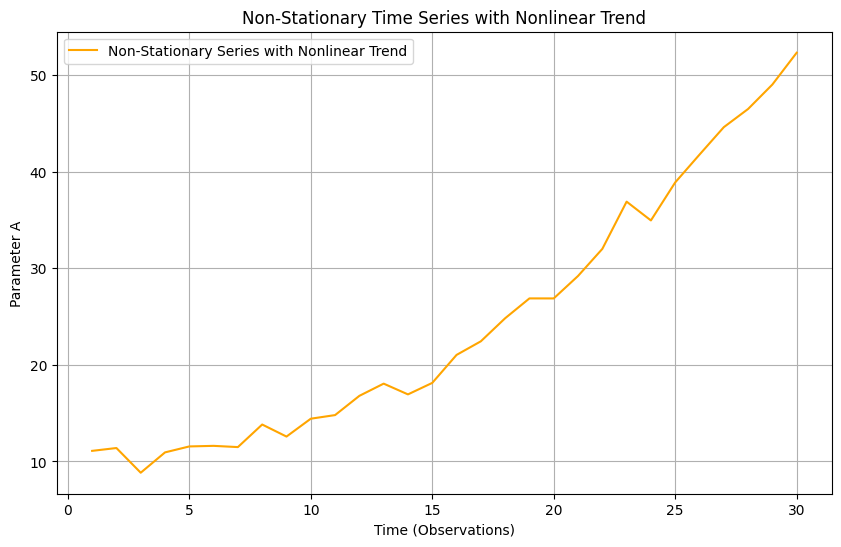

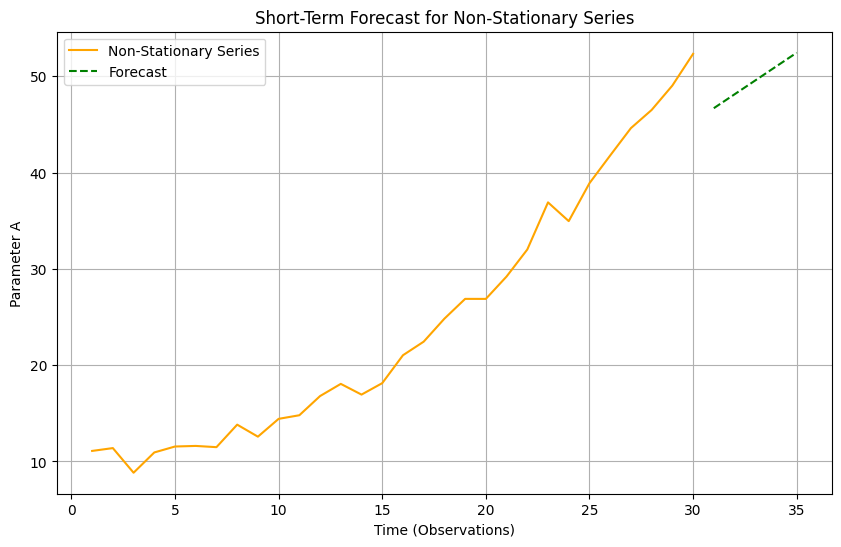

Forecasted values for the next 5 observations (non-stationary series):
[46.68535181 48.1257923  49.56623278 51.00667327 52.44711375]


In [12]:
# 3.2
# Set global random seed for reproducibility
np.random.seed(50)


def generate_stationary_series(length, true_value, noise_std):
    """
    Generates a stationary time series with normally distributed noise.
    
    Args:
        length (int): Number of observations.
        true_value (float): True value of the parameter (constant throughout observations).
        noise_std (float): Standard deviation of the noise.
    
    Returns:
        np.ndarray: Stationary time series.
    """
    noise = np.random.normal(0, noise_std, length)
    series = np.full(length, true_value) + noise
    
    return series


def short_term_forecast(series, future_steps=5):
    """
    Performs short-term forecasting using the least squares method and a linear regression model.
    
    Args:
        series (np.ndarray): Input time series for modeling.
        future_steps (int): Number of future time points to forecast.
    
    Returns:
        np.ndarray: Predicted values for future time points.
    """
    # Prepare training data (time indices and corresponding values)
    X_train = np.arange(len(series)).reshape(-1, 1)
    y_train = series
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Generate future time indices and predict their values
    X_future = np.arange(len(series), len(series) + future_steps).reshape(-1, 1)
    predictions = model.predict(X_future)
    
    return predictions


# 1. Generate and plot stationary time series
N = 30
A_true = 5
std_dev = 1

stationary_series = generate_stationary_series(N, A_true, std_dev)

# Plot the stationary series
plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), stationary_series, label='Stationary Series', color='blue')
plt.title('Stationary Time Series with Normally Distributed Noise')
plt.xlabel('Time (Observations)')
plt.ylabel('Parameter A')
plt.grid(True)
plt.legend()
plt.show()

# Forecast stationary series
forecast_stationary = short_term_forecast(stationary_series)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), stationary_series, label='Stationary Series', color='blue')
plt.plot(range(N + 1, N + 6), forecast_stationary, label='Forecast', color='red', linestyle='--')
plt.title('Short-Term Forecast for Stationary Series')
plt.xlabel('Time (Observations)')
plt.ylabel('Parameter A')
plt.grid(True)
plt.legend()
plt.show()

print("Forecasted values for the next 5 observations (stationary series):")
print(forecast_stationary)


def generate_nonlinear_trend_series(length, base_value, trend_coeff, noise_std):
    """
    Generates a non-stationary time series with a nonlinear trend and noise.
    
    Args:
        length (int): Number of observations.
        base_value (float): Base value of the parameter.
        trend_coeff (float): Coefficient for the quadratic trend.
        noise_std (float): Standard deviation of the noise.
    
    Returns:
        np.ndarray: Non-stationary time series.
    """
    time = np.arange(length)
    trend = trend_coeff * time**2
    series = base_value + trend + np.random.normal(0, noise_std, length)
    
    return series


# 2. Generate and plot non-stationary time series
base_value = 10
trend_coefficient = 0.05
nonstationary_series = generate_nonlinear_trend_series(N, base_value, trend_coefficient, std_dev)

# Plot the non-stationary series
plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), nonstationary_series, label='Non-Stationary Series with Nonlinear Trend', color='orange')
plt.title('Non-Stationary Time Series with Nonlinear Trend')
plt.xlabel('Time (Observations)')
plt.ylabel('Parameter A')
plt.grid(True)
plt.legend()
plt.show()

# Forecast non-stationary series
forecast_nonstationary = short_term_forecast(nonstationary_series)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), nonstationary_series, label='Non-Stationary Series', color='orange')
plt.plot(range(N + 1, N + 6), forecast_nonstationary, label='Forecast', color='green', linestyle='--')
plt.title('Short-Term Forecast for Non-Stationary Series')
plt.xlabel('Time (Observations)')
plt.ylabel('Parameter A')
plt.grid(True)
plt.legend()
plt.show()

print("Forecasted values for the next 5 observations (non-stationary series):")
print(forecast_nonstationary)

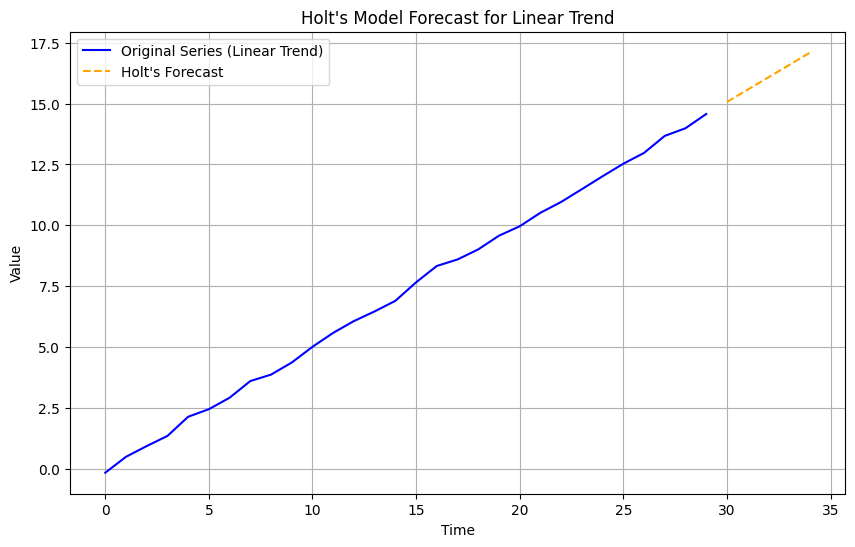

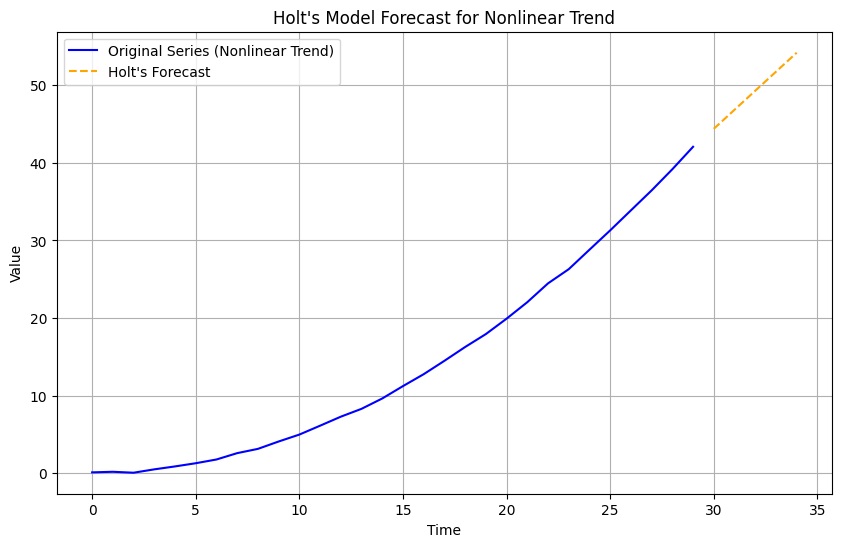

MSE for Linear Trend: 6.4040
MSE for Nonlinear Trend: 161.9179


In [13]:
# 3.3
# Set a random seed for reproducibility
np.random.seed(50)

# Define a function for generating time series with linear or nonlinear trends
def generate_time_series(trend_type="linear", n_points=30, trend_slope=0.5, noise_std=0.1):
    """
    Generates a synthetic time series with a specified trend.

    Args:
        trend_type (str): The type of trend ("linear" or "nonlinear").
        n_points (int): Number of data points in the time series.
        trend_slope (float): The slope of the trend (applies to linear trend).
        noise_std (float): Standard deviation of the random noise.

    Returns:
        tuple: A tuple containing:
            - t (np.ndarray): The time indices.
            - series (np.ndarray): The generated time series.
    """
    t = np.arange(n_points)
    
    if trend_type == "linear":
        series = trend_slope * t + np.random.normal(0, noise_std, n_points)
    elif trend_type == "nonlinear":
        series = 0.05 * t**2 + np.random.normal(0, noise_std, n_points)
    else:
        raise ValueError("Invalid trend_type. Choose 'linear' or 'nonlinear'.")
    
    return t, series

# Define a function to fit Holt's model and forecast
def apply_holt_model(series, forecast_steps=5, smoothing_level=0.8, smoothing_trend=0.2):
    """
    Applies Holt's linear trend model to forecast a time series.

    Args:
        series (np.ndarray): The time series data.
        forecast_steps (int): The number of future points to forecast.
        smoothing_level (float): Smoothing factor for the level.
        smoothing_trend (float): Smoothing factor for the trend.

    Returns:
        np.ndarray: The forecasted values.
    """
    model = Holt(series, initialization_method="estimated").fit(
        smoothing_level=smoothing_level,
        smoothing_trend=smoothing_trend,
        optimized=False
    )
    return model.forecast(steps=forecast_steps)

# Generate a linear time series
t_linear, series_linear = generate_time_series(trend_type="linear", trend_slope=0.5, noise_std=0.1)

# Apply Holt's model to the linear time series
forecast_linear = apply_holt_model(series_linear, forecast_steps=5)

# Plot the original linear series and the forecast
plt.figure(figsize=(10, 6))
plt.plot(t_linear, series_linear, label="Original Series (Linear Trend)", color="blue")
plt.plot(np.arange(len(series_linear), len(series_linear) + 5), forecast_linear, label="Holt's Forecast", linestyle="--", color="orange")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Holt's Model Forecast for Linear Trend")
plt.legend()
plt.grid(True)
plt.show()

# Generate a nonlinear time series
t_nonlinear, series_nonlinear = generate_time_series(trend_type="nonlinear", noise_std=0.1)

# Apply Holt's model to the nonlinear time series
forecast_nonlinear = apply_holt_model(series_nonlinear, forecast_steps=5)

# Plot the original nonlinear series and the forecast
plt.figure(figsize=(10, 6))
plt.plot(t_nonlinear, series_nonlinear, label="Original Series (Nonlinear Trend)", color="blue")
plt.plot(np.arange(len(series_nonlinear), len(series_nonlinear) + 5), forecast_nonlinear, label="Holt's Forecast", linestyle="--", color="orange")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Holt's Model Forecast for Nonlinear Trend")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the accuracy of the forecasts
mse_linear = mean_squared_error(series_linear[-5:], forecast_linear)
mse_nonlinear = mean_squared_error(series_nonlinear[-5:], forecast_nonlinear)

# Print Mean Squared Errors
print(f"MSE for Linear Trend: {mse_linear:.4f}")
print(f"MSE for Nonlinear Trend: {mse_nonlinear:.4f}")